# Berlin crime rate by district and Berlin foursquare venue clusters?
<br>

## Brief introduction to the project
<br>

Subject of this work will be to find out relation or even possible correlation betwen Berlin crime rate in each district and Berlin district clusters, created by machine learning clustering with K-means clustering algorithm of the venues returned by the foursquare API venues search. 

Idea is to find out what is the best place to live in Berlin from the standpoint of crime and from the standpoint of different venues that are categorized by the foursquare application. Ideally we would like to live as close as possible to the venues we have interest in (in my case for example theaters, music pubs possible with live music, and areas for leisure like parks) and also to choose district that is as safe as possible from the standpoint of crime.

After clustering I would like to check venues I am personally interested in like theaters, live music pubs and green areas like parks. Maps for these venues will be created and compared with clusters map, crime rate values and locations of the venues I am interested in.

I hope there are some interesting conclusion that could be found in this project.


## Describing data that will be used in the project
<br>


First data that will be used is the excel table available on the web page of Berlin police <https://www.berlin.de/polizei/service/kriminalitaetsatlas/>. Table is not suitable for use directly in Python pandas manipulation so first we have to create table with the data that will be used in our project.

There are 7 sheets with the crimes data by the district and areas of the district. Only total data for each disttict is used. From these 7 excel sheets for each year one total sheet 2012-2018 is created. That table is used in our analysis.

Interesting columns that will be used are:

* sum of crimes in the district (Sum of Straftaten -insgesamt-) as Total_sum
* sum of body injures (Sum of Körper-verletzungen -insgesamt-) as Total_body_injuries
* sum of house burglaries (Sum of Wohnraum -einbruch) as Total_thefts
* sum of thefts (Sum of Diebstahl -insgesamt-) as Total_burglaries

---

Second data that is used is scrapped table from the wikipedia web page for Berlin districts. I wanted to check are name and number of the districts same as the number and names of the district in the excel table used for crime numbers and apart of that total population column is extracted from the same web page. 

Wikipedia web page from which second data is extracted is 
https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin

---

Third data information that will be used for the project are data from the foursqare venue search. This data are available with the special search that is created. Result of the search are venues in the areas that are searched. These venues are categorized by the name, type of the venue (bar, bus station, hotel etc) latitude, longitude and some other categories that we do not need.

From this foursquare data clusters will be created with the help of machine learning algorithm K-means clustering.

---

Other data that will be used are particular search for the type of the venus I am interested in. Venues that will be searched are theater, pub (it is not possible to find pubs with the live music so search is just for pub) and green area or park. From maps that are created from this data we can see location of the venues we have interest in and visually compare location of this particular venues with the location of districts.
<br>
<br>
<br>

In [1]:
#first I will import all libraries that need in my project
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline

import folium # plotting library

import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import requests

from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


### Load excel data with number of crimes

First we would like to visualize data for each year in order to find is there any significant changes in the number of crimes from the year 2012 to 2018.

In case there is no much difference in the data from year to year total number of the crimes for the years 2012 - 2018 will be used.
<br>

In [2]:
#load prepared excel file into the pandas dataframe
berlin_crimes_2012_2018 = pd.read_excel('Berlin_Crime_Data_2012_2018.xlsx')
berlin_crimes_2012_2018.head(15)

,District,Year,Total _crimes,Total_body_injuries,Total_thefts,Total_burglaries
0,Mitte,2012,85561,7921,36486,1695
1,Friedrichshain-Kreuzberg,2012,50187,4613,22050,1214
2,Pankow,2012,39312,2790,20310,1092
3,Charlottenburg-Wilmersdorf,2012,50719,4224,24061,1544
4,Spandau,2012,27233,2848,11084,589
5,Steglitz-Zehlendorf,2012,25678,1752,12410,961
6,Tempelhof-Schöneberg,2012,39204,3216,17414,1123
7,Neukölln,2012,44793,4368,19121,1388
8,Treptow-Köpenick,2012,22779,1923,9881,605
9,Marzahn-Hellersdorf,2012,24915,3052,9714,457


In [3]:
#check that all data types or ok.
berlin_crimes_2012_2018.dtypes

District               object
Year                    int64
Total _crimes           int64
Total_body_injuries     int64
Total_thefts            int64
Total_burglaries        int64
dtype: object

In [4]:
#extract data for year 2012 in order to make visualization of the data for that year
berlin_crimes_2012 = berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2012]

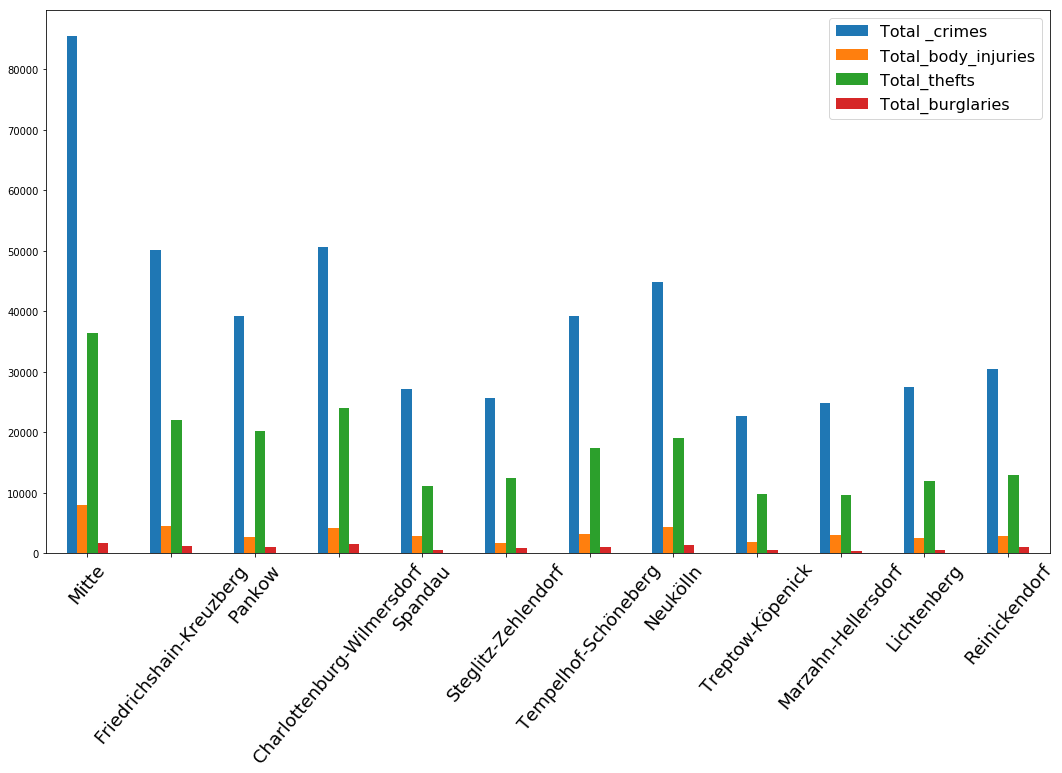

In [5]:
#visualization for the year 2012
berlin_crimes_2012.iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=50)
plt.legend(fontsize=16)
plt.show()

### Same sintax will be used for all other years to see data visualization for each year

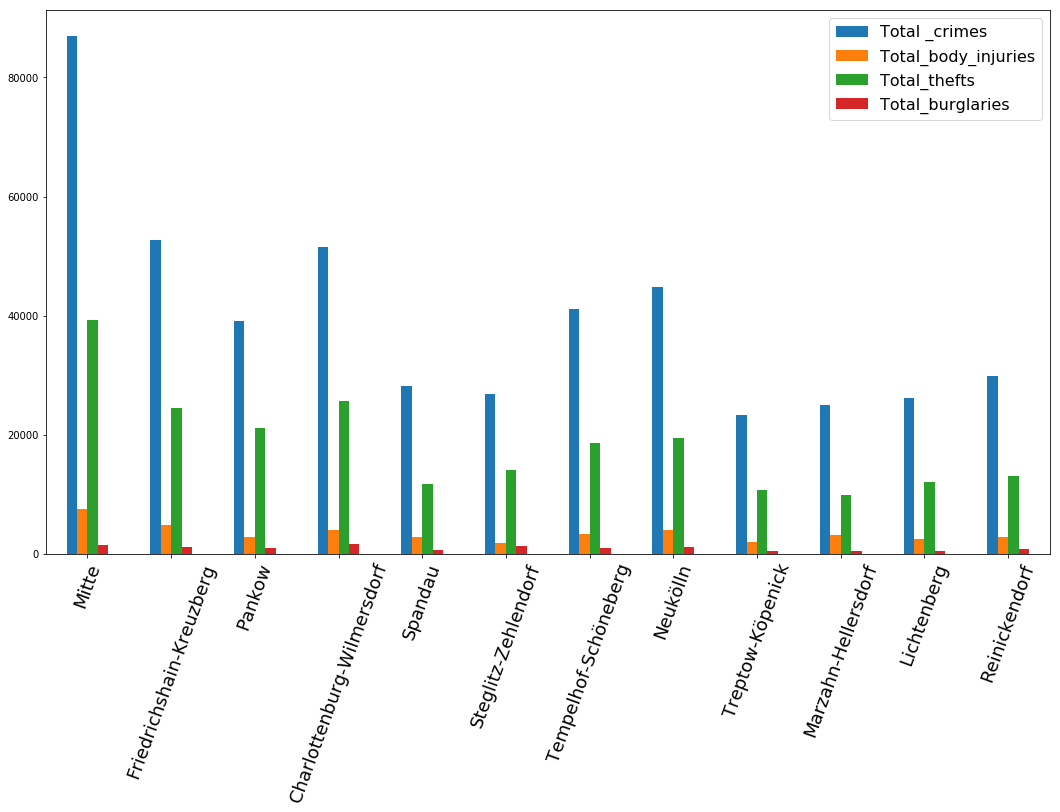

In [6]:
# visualization for the year 2013
berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2013].iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()    
    

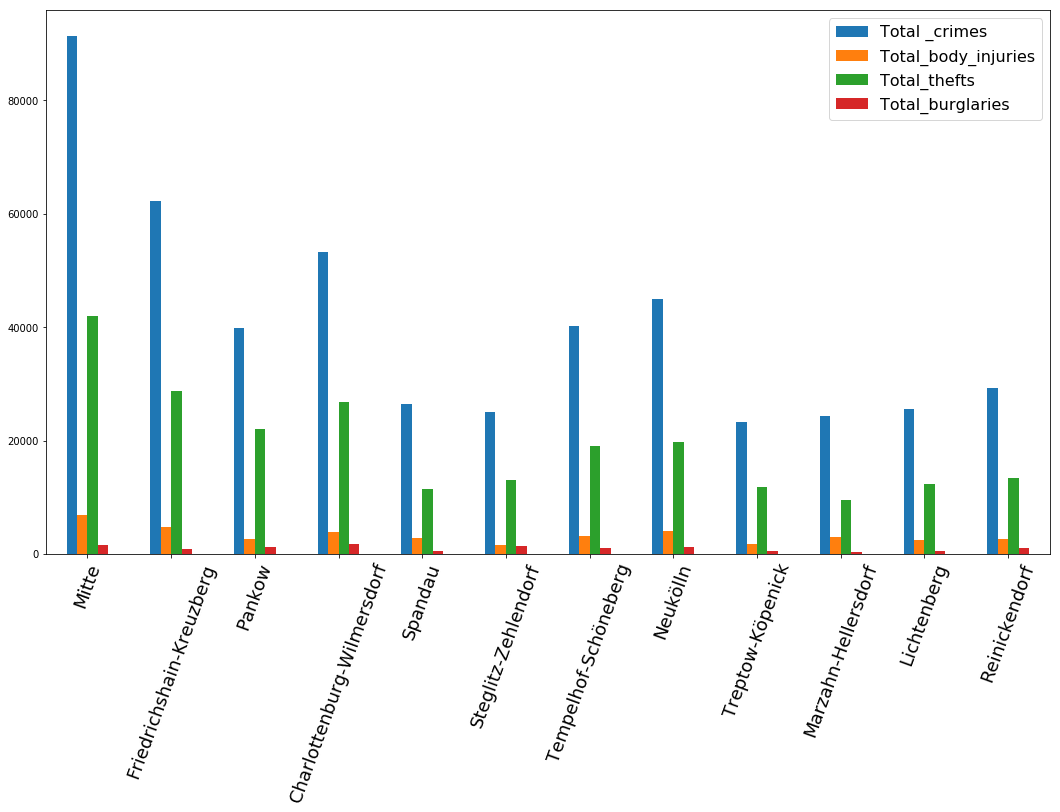

In [7]:
# visualization for the year 2014
berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2014].iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()

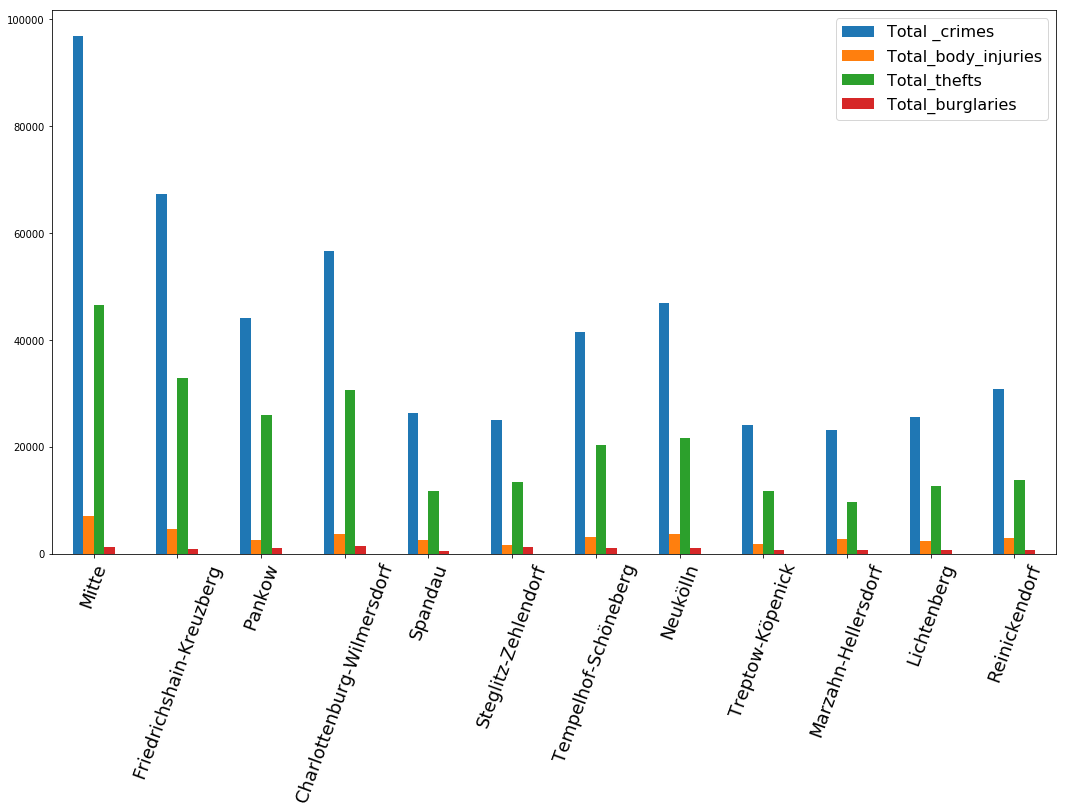

In [8]:
# visualization for the year 2015
berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2015].iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()

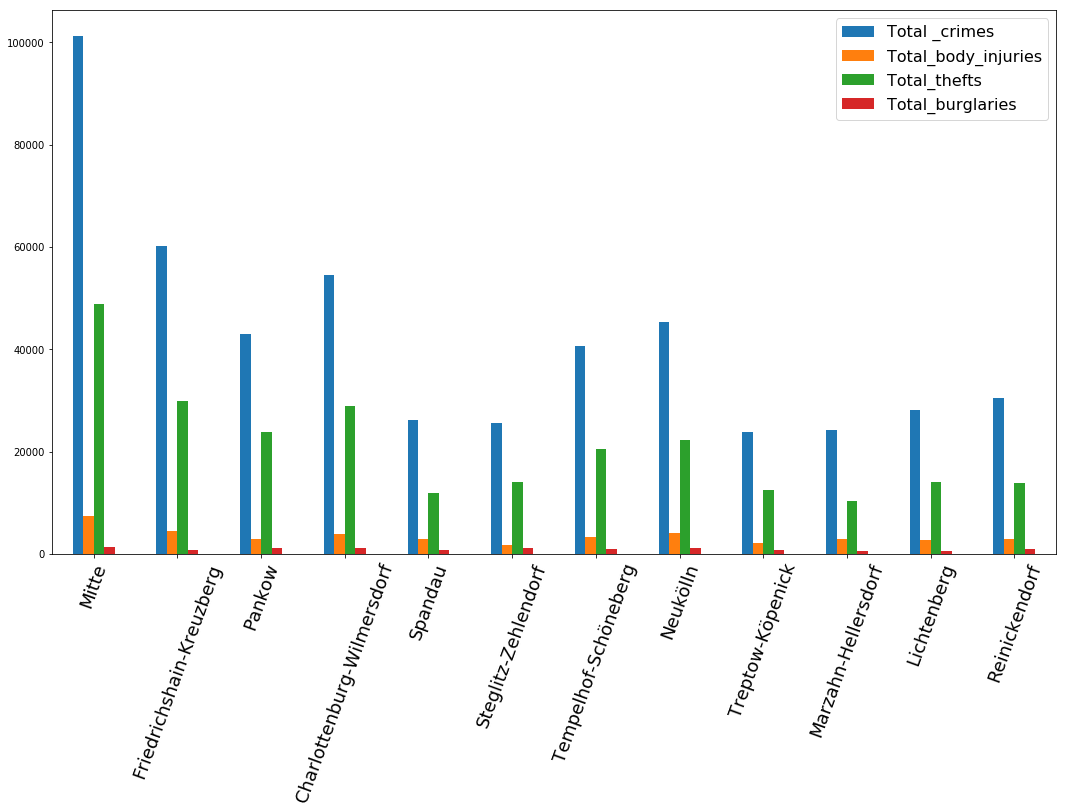

In [9]:
# visualization for the year 2016
berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2016].iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()

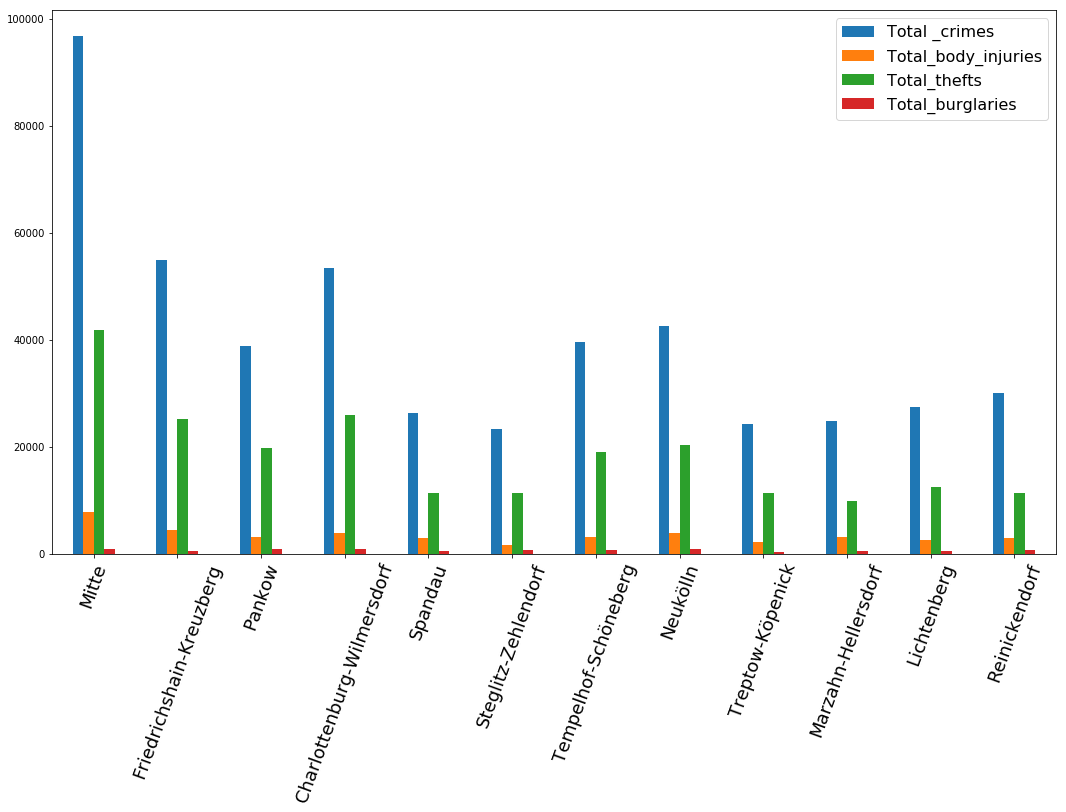

In [10]:
# visualization for the year 2017
berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2017].iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()

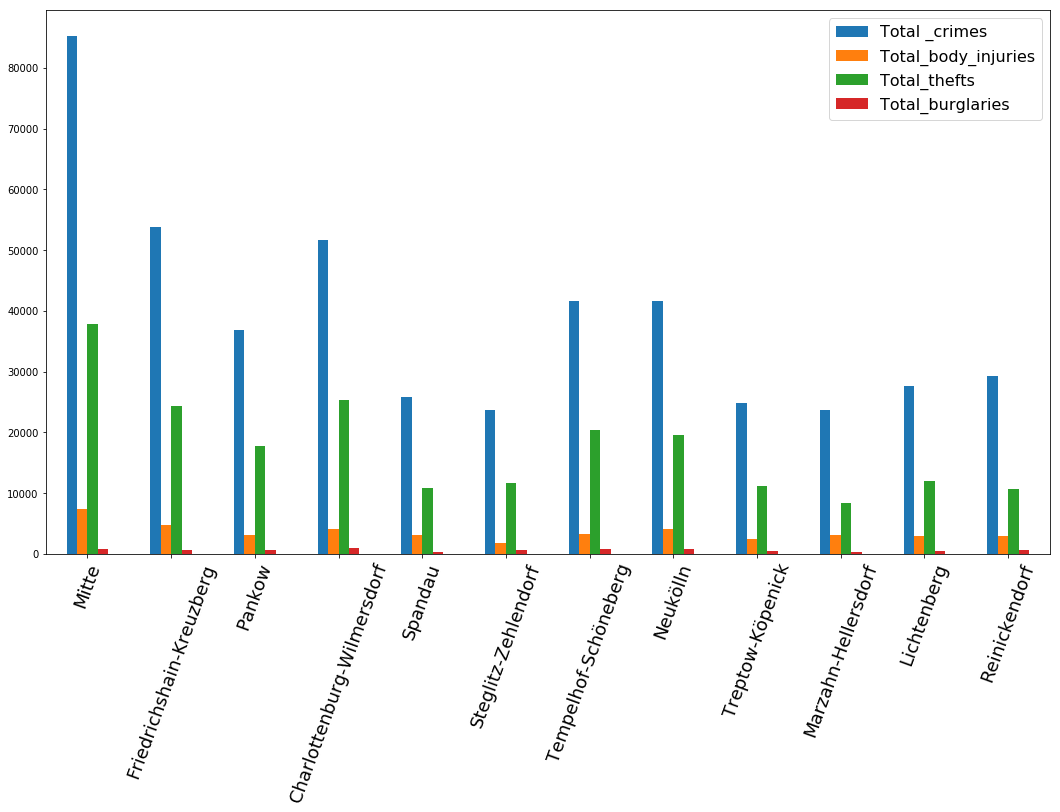

In [11]:
# visualization for the year 2013
berlin_crimes_2012_2018.loc[berlin_crimes_2012_2018['Year'] == 2018].iloc[:,2:6].plot(kind='bar', figsize=(18,10))
plt.xticks(np.arange(len(berlin_crimes_2012)), (berlin_crimes_2012['District']), fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()

### As we can see from the visualization above columns are almost same for every year. That is why it is safe to use total data for each district in our analysis further. 
### That is why in the visualisation for the total number shape of the columns is almost the same as in the each individual year above.
<br>

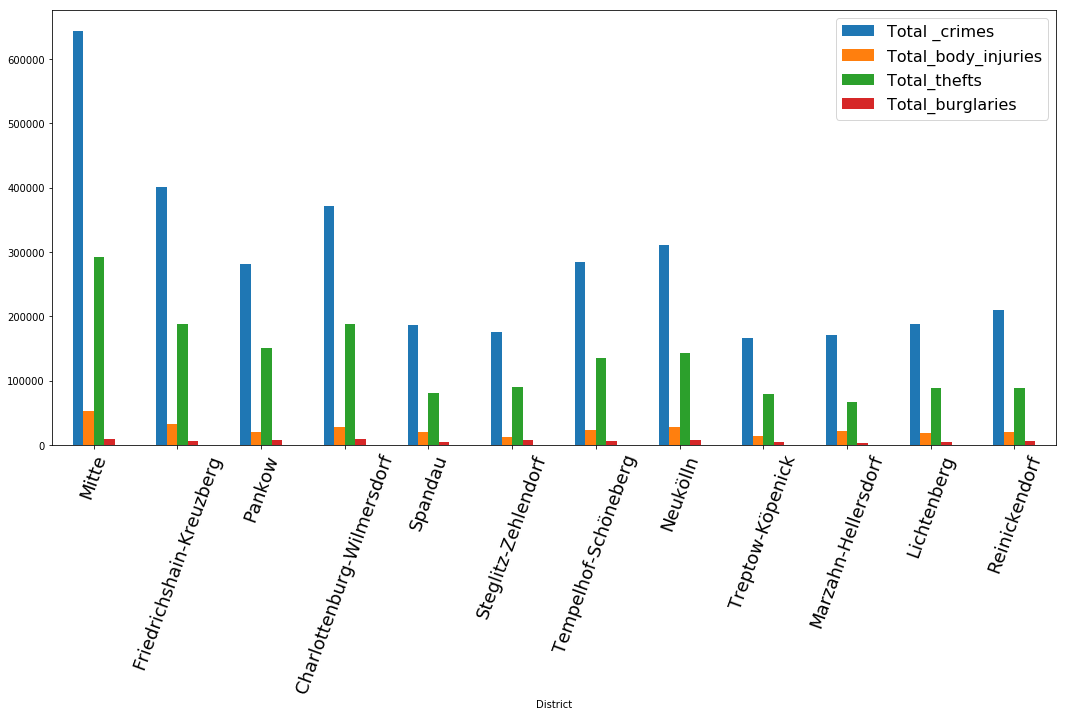

In [12]:
#visualization for the total number of crimes
berlin_crimes_2012_2018.iloc[:,[0,2,3,4,5]].groupby('District', sort=False).sum().plot(kind='bar', 
                                                                                   figsize=(18,8))
plt.xticks(fontsize=18, rotation=70)
plt.legend(fontsize=16)
plt.show()

In [13]:
#I will create now new dataframe berlin total number of crimes
berlin_total_crimes = berlin_crimes_2012_2018.iloc[:,[0,2,3,4,5]].groupby('District', sort=False).sum()
berlin_total_crimes.sort_values(by=('District'), inplace=True)
berlin_total_crimes.reset_index(inplace=True)
berlin_total_crimes

,District,Total _crimes,Total_body_injuries,Total_thefts,Total_burglaries
0,Charlottenburg-Wilmersdorf,371664,27800,187462,9510
1,Friedrichshain-Kreuzberg,401275,32713,187738,6092
2,Lichtenberg,188071,17958,87765,4066
3,Marzahn-Hellersdorf,170086,21231,67436,3404
4,Mitte,643862,52033,292849,9070
5,Neukölln,311245,28167,142331,7945
6,Pankow,280994,19883,150725,7065
7,Reinickendorf,210062,19900,89024,6161
8,Spandau,186454,19926,80118,4001
9,Steglitz-Zehlendorf,175331,11987,90131,7470


### Extract from the wikipedia web page table with Berlin districts and number of the population in each district.

<https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin>

In [14]:
source = requests.get('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin').text
soup = BeautifulSoup(source, 'lxml') #parser is lxml

In [15]:
#print(soup.prettify())

In [16]:
table = soup.find('table', class_="sortable wikitable")
#print(table.prettify())

In [17]:
table_rows = table.find_all('tr')
len(table_rows)

13

In [18]:
#create list of the items in the table, from that list dataframe will be created
berlin_list = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text.strip() for i in td]
    #print(row)
    berlin_list.append(row)
berlin_list[1:]

[['Charlottenburg-Wilmersdorf', '319,628', '64.72', '4,878', ''],
 ['Friedrichshain-Kreuzberg', '268,225', '20.16', '13,187'],
 ['Lichtenberg', '259,881', '52.29', '4,952'],
 ['Marzahn-Hellersdorf', '248,264', '61.74', '4,046'],
 ['Mitte', '332,919', '39.47', '8,272'],
 ['Neukölln', '310,283', '44.93', '6,804'],
 ['Pankow', '366,441', '103.01', '3,476'],
 ['Reinickendorf', '240,454', '89.46', '2,712'],
 ['Spandau', '223,962', '91.91', '2,441'],
 ['Steglitz-Zehlendorf', '293,989', '102.50', '2,818'],
 ['Tempelhof-Schöneberg', '335,060', '53.09', '6,256'],
 ['Treptow-Köpenick', '241,335', '168.42', '1,406']]

In [19]:
df_districts = pd.DataFrame(berlin_list[1:])
df_districts.drop([2, 3, 4], axis=1, inplace=True) #drop area, density and empty column
df_districts.rename(columns={0:'districts', 1:'population'}, inplace=True)
df_districts

,districts,population
0,Charlottenburg-Wilmersdorf,"319,628"
1,Friedrichshain-Kreuzberg,"268,225"
2,Lichtenberg,"259,881"
3,Marzahn-Hellersdorf,"248,264"
4,Mitte,"332,919"
5,Neukölln,"310,283"
6,Pankow,"366,441"
7,Reinickendorf,"240,454"
8,Spandau,"223,962"
9,Steglitz-Zehlendorf,"293,989"


In [20]:
#in order to convert population column to integer I have to remove ',' from the string
df_districts['population'] = df_districts.population.apply(lambda x: x.split(',')[0] + x.split(',')[1])
df_districts

,districts,population
0,Charlottenburg-Wilmersdorf,319628
1,Friedrichshain-Kreuzberg,268225
2,Lichtenberg,259881
3,Marzahn-Hellersdorf,248264
4,Mitte,332919
5,Neukölln,310283
6,Pankow,366441
7,Reinickendorf,240454
8,Spandau,223962
9,Steglitz-Zehlendorf,293989


In [21]:
df_districts['population'] = df_districts['population'].astype('int')

In [22]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
districts     12 non-null object
population    12 non-null int32
dtypes: int32(1), object(1)
memory usage: 224.0+ bytes


### Merge two dataframes in one final DF that will be used in final analysis

In [23]:
#now I will merge two dataframes
df_districts = df_districts.merge(berlin_total_crimes, how='inner', left_on='districts', right_on = 'District',
                   indicator=False)
df_districts.drop(['districts'], axis=1, inplace=True)

df_districts

,population,District,Total _crimes,Total_body_injuries,Total_thefts,Total_burglaries
0,319628,Charlottenburg-Wilmersdorf,371664,27800,187462,9510
1,268225,Friedrichshain-Kreuzberg,401275,32713,187738,6092
2,259881,Lichtenberg,188071,17958,87765,4066
3,248264,Marzahn-Hellersdorf,170086,21231,67436,3404
4,332919,Mitte,643862,52033,292849,9070
5,310283,Neukölln,311245,28167,142331,7945
6,366441,Pankow,280994,19883,150725,7065
7,240454,Reinickendorf,210062,19900,89024,6161
8,223962,Spandau,186454,19926,80118,4001
9,293989,Steglitz-Zehlendorf,175331,11987,90131,7470


In [24]:
df_districts.columns

Index(['population', 'District', 'Total _crimes', 'Total_body_injuries',
       'Total_thefts', 'Total_burglaries'],
      dtype='object')

In [25]:
#there was a mistake in naming Total crimes column. There is one extra space in the name that has to be
#reemoved
df_districts.rename(columns={'Total _crimes':'Total_crimes'}, inplace=True)
df_districts.columns

Index(['population', 'District', 'Total_crimes', 'Total_body_injuries',
       'Total_thefts', 'Total_burglaries'],
      dtype='object')

### We can see that central Berlin has biggest number of crimes in total and almost in all categories. Kreuzberg and Charlotenburg are second and the third one.

In [26]:
#I will sort dataframe by the total sum of crimes in each district.
df_districts.sort_values(by=['Total_crimes'], ascending=False)

,population,District,Total_crimes,Total_body_injuries,Total_thefts,Total_burglaries
4,332919,Mitte,643862,52033,292849,9070
1,268225,Friedrichshain-Kreuzberg,401275,32713,187738,6092
0,319628,Charlottenburg-Wilmersdorf,371664,27800,187462,9510
5,310283,Neukölln,311245,28167,142331,7945
10,335060,Tempelhof-Schöneberg,283823,22527,135523,6757
6,366441,Pankow,280994,19883,150725,7065
7,240454,Reinickendorf,210062,19900,89024,6161
2,259881,Lichtenberg,188071,17958,87765,4066
8,223962,Spandau,186454,19926,80118,4001
9,293989,Steglitz-Zehlendorf,175331,11987,90131,7470


## Explore venues in Berlin with forsquare api

First I have to find all latitudes and longitudes for Berlin districts and append them to the dataframe. 

In [27]:
latitude_list = []
longitude_list = []
for i in df_districts['District']:
    address = (i + ', Berlin')

    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    if location != None:
        latitude = location.latitude
        longitude = location.longitude
        latitude_list.append(latitude)
        longitude_list.append(longitude)
    else:
        latitude_list.append('no value')
        longitude_list.append('no value')        
    
print(latitude_list, longitude_list)

[52.5078558, 52.5153063, 52.5321606, 52.5225225, 52.5176896, 52.4811497, 52.59766255, 52.6047631, 52.5192672, 52.4292052, 52.4406033, 52.417893] [13.2639518, 13.4616117, 13.5118927, 13.5876634, 13.4023757, 13.4353501, 13.436351401882, 13.2952872, 13.195439, 13.2299741, 13.3737035, 13.6001848]


In [28]:
a_list = []
for i in zip(latitude_list, longitude_list):
    a_list.append(i)
a_list

[(52.5078558, 13.2639518),
 (52.5153063, 13.4616117),
 (52.5321606, 13.5118927),
 (52.5225225, 13.5876634),
 (52.5176896, 13.4023757),
 (52.4811497, 13.4353501),
 (52.59766255, 13.436351401882),
 (52.6047631, 13.2952872),
 (52.5192672, 13.195439),
 (52.4292052, 13.2299741),
 (52.4406033, 13.3737035),
 (52.417893, 13.6001848)]

In [29]:
df_lat_lng = pd.DataFrame(a_list, columns=['lat', 'lng'])
df_lat_lng.head()

,lat,lng
0,52.507856,13.263952
1,52.515306,13.461612
2,52.532161,13.511893
3,52.522523,13.587663
4,52.517690,13.402376


In [30]:
df_districts['lat'] = df_lat_lng['lat']
df_districts['lng'] = df_lat_lng['lng']
df_districts

,population,District,Total_crimes,Total_body_injuries,Total_thefts,Total_burglaries,lat,lng
0,319628,Charlottenburg-Wilmersdorf,371664,27800,187462,9510,52.507856,13.263952
1,268225,Friedrichshain-Kreuzberg,401275,32713,187738,6092,52.515306,13.461612
2,259881,Lichtenberg,188071,17958,87765,4066,52.532161,13.511893
3,248264,Marzahn-Hellersdorf,170086,21231,67436,3404,52.522523,13.587663
4,332919,Mitte,643862,52033,292849,9070,52.517690,13.402376
5,310283,Neukölln,311245,28167,142331,7945,52.481150,13.435350
6,366441,Pankow,280994,19883,150725,7065,52.597663,13.436351
7,240454,Reinickendorf,210062,19900,89024,6161,52.604763,13.295287
8,223962,Spandau,186454,19926,80118,4001,52.519267,13.195439
9,293989,Steglitz-Zehlendorf,175331,11987,90131,7470,52.429205,13.229974


In [31]:
df_districts.columns

Index(['population', 'District', 'Total_crimes', 'Total_body_injuries',
       'Total_thefts', 'Total_burglaries', 'lat', 'lng'],
      dtype='object')

In [32]:
df_berlin = df_districts.drop(['population', 'Total_crimes', 'Total_body_injuries',
       'Total_thefts', 'Total_burglaries',], axis=1)
df_berlin

,District,lat,lng
0,Charlottenburg-Wilmersdorf,52.507856,13.263952
1,Friedrichshain-Kreuzberg,52.515306,13.461612
2,Lichtenberg,52.532161,13.511893
3,Marzahn-Hellersdorf,52.522523,13.587663
4,Mitte,52.517690,13.402376
5,Neukölln,52.481150,13.435350
6,Pankow,52.597663,13.436351
7,Reinickendorf,52.604763,13.295287
8,Spandau,52.519267,13.195439
9,Steglitz-Zehlendorf,52.429205,13.229974


In [33]:
address = 'Berlin'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.5170365 13.3888599


In [83]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_berlin['lat'], df_berlin['lng'], df_berlin['District']):
    label = folium.Popup(label, parse_html=True, sticky=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

### Define Foursquare Credentials and Version

In [35]:
CLIENT_ID = 'G5LVEOE3FLIASFNRITJLWM1Q0GELIKATD3R3ZEQ0YYYTE3DF' # your Foursquare ID
CLIENT_SECRET = 'YHIQ2ZT4CBJZMOMXAHADXPNRKWCWRGOBC2D34U4JHLOUAFHR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G5LVEOE3FLIASFNRITJLWM1Q0GELIKATD3R3ZEQ0YYYTE3DF
CLIENT_SECRET:YHIQ2ZT4CBJZMOMXAHADXPNRKWCWRGOBC2D34U4JHLOUAFHR


### Create function to loop through every district in Berlin to find venues in each district

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Use function that was created above with the dataframe df_berlin as an input

In [37]:
berlin_venues = getNearbyVenues(names=df_berlin['District'],
                                   latitudes=df_berlin['lat'],
                                   longitudes=df_berlin['lng']
                                  )

Charlottenburg-Wilmersdorf
Friedrichshain-Kreuzberg
Lichtenberg
Marzahn-Hellersdorf
Mitte
Neukölln
Pankow
Reinickendorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schöneberg
Treptow-Köpenick


In [38]:
print(berlin_venues.shape)
berlin_venues.head()

(631, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508830,13.270733,Comedy Club
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Block House,52.509393,13.270958,Steakhouse
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Café K,52.509789,13.255227,Café


In [39]:
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlottenburg-Wilmersdorf,78,78,78,78,78,78
Friedrichshain-Kreuzberg,100,100,100,100,100,100
Lichtenberg,42,42,42,42,42,42
Marzahn-Hellersdorf,36,36,36,36,36,36
Mitte,100,100,100,100,100,100
Neukölln,100,100,100,100,100,100
Pankow,21,21,21,21,21,21
Reinickendorf,12,12,12,12,12,12
Spandau,28,28,28,28,28,28


In [40]:
print('There are total {} number of venues.'.format(berlin_venues.shape[0]))
print('There are {} uniques categories of venues.'.format(len(berlin_venues['Venue Category'].unique())))

There are total 631 number of venues.
There are 185 uniques categories of venues.


### Convert to dummy variables in order to prepare data for clustering

In [41]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix='', prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
#print(fixed_columns)
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head(5)

,Yoga Studio,ATM,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Stop,Cable Car,Cafeteria,Café,Canal,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Kumpir Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lottery Retailer,Lounge,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Road,Roof Deck,Russian Restaurant,Sandwich Place,Scenic Lookout,Shipping Store,Shopping Mall,Shopping Plaza,Soccer Field,South American Restaurant,Speakeasy,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [42]:
berlin_onehot.shape

(631, 185)

### Create dataframe grouped that will be used for clustering

In [43]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,Yoga Studio,ATM,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Stop,Cable Car,Cafeteria,Café,Canal,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Kumpir Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lottery Retailer,Lounge,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Road,Roof Deck,Russian Restaurant,Sandwich Place,Scenic Lookout,Shipping Store,Shopping Mall,Shopping Plaza,Soccer Field,South American Restaurant,Speakeasy,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop
0,Charlottenburg-Wilmersdorf,0.00,0.000000,0.00,0.012821,0.00,0.012821,0.025641,0.000000,0.00000,0.00000,0.012821,0.00,0.025641,0.000000,0.012821,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.025641,0.000000,0.00,0.00,0.012821,0.00,0.00,0.000000,0.012821,0.00,0.00,0.025641,0.000000,0.00000,0.064103,0.000000,0.00,0.025641,0.00,0.00,0.000000,0.00,0.00,0.00,0.025641,0.012821,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.012821,0.000000,0.00,0.012821,0.012821,0.012821,0.00,0.012821,0.00,0.00000,0.012821,0.000000,0.000000,0.00,0.012821,0.000000,0.00,0.012821,0.012821,0.000000,0.00,0.00,0.025641,0.00,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,0.000000,0.00000,0.076923,0.025641,0.012821,0.00000,0.00,0.000000,0.000000,0.012821,0.076923,0.012821,0.00,0.00,0.000000,0.00,0.012821,0.000000,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.012821,0.025641,0.00,0.000000,0.00,0.00,0.000000,0.012821,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.012821,0.00,0.025641,0.00,0.00,0.012821,0.000000,0.00000,0.000000,0.00,0.012821,0.00,0.038462,0.00,0.000000,0.00,0.00,0.00,0.00000,0.012821,0.000000,0.00,0.00,0.00,0.00,0.012821,0.00000,0.000000,0.00,0.00000,0.00,0.00,0.00000,0.012821,0.012821,0.038462,0.00,0.00,0.00,0.000000,0.000000,0.012821,0.00,0.000000,0.00,0.000000,0.000000,0.012821,0.00,0.00,0.012821,0.000000,0.00,0.00
1,Friedrichshain-Kreuzberg,0.01,0.000000,0.01,0.000000,0.00,0.000000,0.030

In [44]:
#find top 5 venues in each district
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
                venue  freq
0  Italian Restaurant  0.08
1               Hotel  0.08
2                Café  0.06
3         Supermarket  0.04
4               Plaza  0.04


----Friedrichshain-Kreuzberg----
                venue  freq
0                Café  0.13
1         Pizza Place  0.07
2      Ice Cream Shop  0.06
3                 Bar  0.05
4  Falafel Restaurant  0.05


----Lichtenberg----
              venue  freq
0      Tram Station  0.17
1             Hotel  0.05
2  Indoor Play Area  0.05
3       Music Venue  0.05
4    Hardware Store  0.05


----Marzahn-Hellersdorf----
            venue  freq
0     Supermarket  0.22
1            Park  0.08
2  Ice Cream Shop  0.06
3           Hotel  0.06
4        Bus Stop  0.06


----Mitte----
            venue  freq
0           Hotel  0.14
1  History Museum  0.05
2            Café  0.04
3           Plaza  0.04
4     Coffee Shop  0.04


----Neukölln----
                venue  freq
0                 Bar  0.11
1      

In [45]:
#function to return most common venues in each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Hotel,Italian Restaurant,Café,Supermarket,Plaza,Park,Boarding House,Comedy Club,German Restaurant,Chinese Restaurant
1,Friedrichshain-Kreuzberg,Café,Pizza Place,Ice Cream Shop,Bar,Falafel Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant,Asian Restaurant,Bagel Shop
2,Lichtenberg,Tram Station,Music Venue,Supermarket,Hotel,Automotive Shop,Indoor Play Area,Furniture / Home Store,Hardware Store,Pharmacy,Cafeteria
3,Marzahn-Hellersdorf,Supermarket,Park,Drugstore,Bus Stop,Hotel,Ice Cream Shop,Scenic Lookout,Diner,Metro Station,Light Rail Station
4,Mitte,Hotel,History Museum,Coffee Shop,Plaza,Café,Bookstore,Chocolate Shop,Restaurant,Indie Movie Theater,Vietnamese Restaurant


In [47]:
# set number of clusters
kclusters = 4

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 0, 1, 3, 3, 1, 2, 1, 1])

In [48]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = df_berlin

# merge berlin_grouped with berlin_data to add latitude/longitude for each neighborhood

berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

berlin_merged.head(20) # check the last columns!

,District,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,3,Hotel,Italian Restaurant,Café,Supermarket,Plaza,Park,Boarding House,Comedy Club,German Restaurant,Chinese Restaurant
1,Friedrichshain-Kreuzberg,52.515306,13.461612,3,Café,Pizza Place,Ice Cream Shop,Bar,Falafel Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant,Asian Restaurant,Bagel Shop
2,Lichtenberg,52.532161,13.511893,0,Tram Station,Music Venue,Supermarket,Hotel,Automotive Shop,Indoor Play Area,Furniture / Home Store,Hardware Store,Pharmacy,Cafeteria
3,Marzahn-Hellersdorf,52.522523,13.587663,1,Supermarket,Park,Drugstore,Bus Stop,Hotel,Ice Cream Shop,Scenic Lookout,Diner,Metro Station,Light Rail Station
4,Mitte,52.517690,13.402376,3,Hotel,History Museum,Coffee Shop,Plaza,Café,Bookstore,Chocolate Shop,Restaurant,Indie Movie Theater,Vietnamese Restaurant
5,Neukölln,52.481150,13.435350,3,Bar,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,Indie Movie Theater,German Restaurant,Food & Drink Shop,Wine Shop,Middle Eastern Restaurant
6,Pankow,52.597663,13.436351,1,Supermarket,ATM,Greek Restaurant,Hotel,Pet Store,Café,Flower Shop,Liquor Store,Light Rail Station,Bus Stop
7,Reinickendorf,52.604763,13.295287,2,Hostel,Nature Preserve,Food & Drink Shop,Restaurant,Supermarket,Italian Restaurant,Tennis Court,Insurance Office,Intersection,Chinese Restaurant
8,Spandau,52.519267,13.195439,1,Supermarket,Pizza Place,Hardware Store,Pet Store,Restaurant,Drugstore,Bus Stop,Plaza,Fried Chicken Joint,Gastropub
9,Steglitz-Zehlendorf,52.429205,13.229974,1,Italian Restaurant,Supermarket,Bus Stop,Café,Steakhouse,Indian Restaurant,Lottery Retailer,Restaurant,Liquor Store,Light Rail Station


In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['lat'], berlin_merged['lng'], berlin_merged['District'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Inspect clusters

In [50]:
#inspect cluster 0
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0]

,District,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Lichtenberg,52.532161,13.511893,0,Tram Station,Music Venue,Supermarket,Hotel,Automotive Shop,Indoor Play Area,Furniture / Home Store,Hardware Store,Pharmacy,Cafeteria
11,Treptow-Köpenick,52.417893,13.600185,0,Supermarket,Beach,Tram Station,Construction & Landscaping,Gastropub,Plaza,Café,River,Restaurant,Lake


In [51]:
#inspect cluster 1
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1]

,District,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Marzahn-Hellersdorf,52.522523,13.587663,1,Supermarket,Park,Drugstore,Bus Stop,Hotel,Ice Cream Shop,Scenic Lookout,Diner,Metro Station,Light Rail Station
6,Pankow,52.597663,13.436351,1,Supermarket,ATM,Greek Restaurant,Hotel,Pet Store,Café,Flower Shop,Liquor Store,Light Rail Station,Bus Stop
8,Spandau,52.519267,13.195439,1,Supermarket,Pizza Place,Hardware Store,Pet Store,Restaurant,Drugstore,Bus Stop,Plaza,Fried Chicken Joint,Gastropub
9,Steglitz-Zehlendorf,52.429205,13.229974,1,Italian Restaurant,Supermarket,Bus Stop,Café,Steakhouse,Indian Restaurant,Lottery Retailer,Restaurant,Liquor Store,Light Rail Station
10,Tempelhof-Schöneberg,52.440603,13.373703,1,Supermarket,Bus Stop,Grocery Store,Bank,Light Rail Station,Bakery,Italian Restaurant,Gym,Food & Drink Shop,Fried Chicken Joint


In [52]:
#inspect cluster 2
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2]

,District,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Reinickendorf,52.604763,13.295287,2,Hostel,Nature Preserve,Food & Drink Shop,Restaurant,Supermarket,Italian Restaurant,Tennis Court,Insurance Office,Intersection,Chinese Restaurant


In [53]:
#inspect cluster 3
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3]

,District,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,3,Hotel,Italian Restaurant,Café,Supermarket,Plaza,Park,Boarding House,Comedy Club,German Restaurant,Chinese Restaurant
1,Friedrichshain-Kreuzberg,52.515306,13.461612,3,Café,Pizza Place,Ice Cream Shop,Bar,Falafel Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Thai Restaurant,Asian Restaurant,Bagel Shop
4,Mitte,52.517690,13.402376,3,Hotel,History Museum,Coffee Shop,Plaza,Café,Bookstore,Chocolate Shop,Restaurant,Indie Movie Theater,Vietnamese Restaurant
5,Neukölln,52.481150,13.435350,3,Bar,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,Indie Movie Theater,German Restaurant,Food & Drink Shop,Wine Shop,Middle Eastern Restaurant


### Compare clustering with the data from the crime table

In [54]:
df_districts_new = df_districts

In [55]:
df_districts_new['Label'] = berlin_merged['Cluster Labels']
df_districts_new

,population,District,Total_crimes,Total_body_injuries,Total_thefts,Total_burglaries,lat,lng,Label
0,319628,Charlottenburg-Wilmersdorf,371664,27800,187462,9510,52.507856,13.263952,3
1,268225,Friedrichshain-Kreuzberg,401275,32713,187738,6092,52.515306,13.461612,3
2,259881,Lichtenberg,188071,17958,87765,4066,52.532161,13.511893,0
3,248264,Marzahn-Hellersdorf,170086,21231,67436,3404,52.522523,13.587663,1
4,332919,Mitte,643862,52033,292849,9070,52.517690,13.402376,3
5,310283,Neukölln,311245,28167,142331,7945,52.481150,13.435350,3
6,366441,Pankow,280994,19883,150725,7065,52.597663,13.436351,1
7,240454,Reinickendorf,210062,19900,89024,6161,52.604763,13.295287,2
8,223962,Spandau,186454,19926,80118,4001,52.519267,13.195439,1
9,293989,Steglitz-Zehlendorf,175331,11987,90131,7470,52.429205,13.229974,1


In [56]:
df_districts_new.sort_values(by='Total_crimes', ascending=False)

,population,District,Total_crimes,Total_body_injuries,Total_thefts,Total_burglaries,lat,lng,Label
4,332919,Mitte,643862,52033,292849,9070,52.517690,13.402376,3
1,268225,Friedrichshain-Kreuzberg,401275,32713,187738,6092,52.515306,13.461612,3
0,319628,Charlottenburg-Wilmersdorf,371664,27800,187462,9510,52.507856,13.263952,3
5,310283,Neukölln,311245,28167,142331,7945,52.481150,13.435350,3
10,335060,Tempelhof-Schöneberg,283823,22527,135523,6757,52.440603,13.373703,1
6,366441,Pankow,280994,19883,150725,7065,52.597663,13.436351,1
7,240454,Reinickendorf,210062,19900,89024,6161,52.604763,13.295287,2
2,259881,Lichtenberg,188071,17958,87765,4066,52.532161,13.511893,0
8,223962,Spandau,186454,19926,80118,4001,52.519267,13.195439,1
9,293989,Steglitz-Zehlendorf,175331,11987,90131,7470,52.429205,13.229974,1


## Search for a specific venue category

I will choose categories that metters to me. Someone else can choose something completely different.

## First is theater

In [57]:
search_query = 'theater'
radius =10000
print(search_query + ' .... OK!')

theater .... OK!


In [58]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=G5LVEOE3FLIASFNRITJLWM1Q0GELIKATD3R3ZEQ0YYYTE3DF&client_secret=YHIQ2ZT4CBJZMOMXAHADXPNRKWCWRGOBC2D34U4JHLOUAFHR&ll=52.5170365,13.3888599&v=20180604&query=theater&radius=10000&limit=100'

In [59]:
results = requests.get(url).json()
#results

In [60]:
venues = results['response']['venues']
venues

[{'id': '4adcda89f964a520954921e3',
  'name': 'Maxim Gorki Theater',
  'location': {'address': 'Am Festungsgraben 1',
   'lat': 52.51894077519612,
   'lng': 13.39524493467083,
   'labeledLatLngs': [{'label': 'display',
     'lat': 52.51894077519612,
     'lng': 13.39524493467083}],
   'distance': 481,
   'postalCode': '10117',
   'cc': 'DE',
   'city': 'Berlin',
   'state': 'Berlin',
   'country': 'Deutschland',
   'formattedAddress': ['Am Festungsgraben 1', '10117 Berlin', 'Deutschland']},
  'categories': [{'id': '4bf58dd8d48988d137941735',
    'name': 'Theater',
    'pluralName': 'Theaters',
    'shortName': 'Theater',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1573578432',
  'hasPerk': False},
 {'id': '4f86bff7e4b0d85ee62c1d4f',
  'name': 'Kantine Maxim Gorki Theater',
  'location': {'address': 'Dorotheenstr. 9',
   'lat': 52.519091815308634,
   'lng': 1

In [61]:
name = venues[0]['name']
name

'Maxim Gorki Theater'

In [62]:
lat = venues[0]['location']['lat']
lat

52.51894077519612

In [63]:
lng = venues[0]['location']['lng']
lng

13.39524493467083

In [64]:
name_list = []
lat_list = []
lng_list = []
for i in range(len(venues)):
    name = venues[i]['name']
    name_list.append(name)
    lat = venues[i]['location']['lat']
    lat_list.append(lat)
    lng = venues[i]['location']['lng']
    lng_list.append(lng)

In [65]:
a_list = []
for i in zip(name_list, lat_list, lng_list):
    a_list.append(i)
a_list[:4]

[('Maxim Gorki Theater', 52.51894077519612, 13.39524493467083),
 ('Kantine Maxim Gorki Theater', 52.519091815308634, 13.395514286468295),
 ('Café am Deutschen Theater', 52.523069137429516, 13.383718729019165),
 ('Stage Theater am Potsdamer Platz', 52.507124850273605, 13.372156477707904)]

In [66]:
#creating dataframe berlin theaters that will be used for the creation of folium map
berlin_theaters = pd.DataFrame(a_list, columns=['Theater', 'lat', 'lng'])
berlin_theaters.head()

,Theater,lat,lng
0,Maxim Gorki Theater,52.518941,13.395245
1,Kantine Maxim Gorki Theater,52.519092,13.395514
2,Café am Deutschen Theater,52.523069,13.383719
3,Stage Theater am Potsdamer Platz,52.507125,13.372156
4,Stage Bluemax Theater,52.507093,13.373183


In [67]:
theaters_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

for lat, lng, label in zip(berlin_theaters['lat'], berlin_theaters['lng'], berlin_theaters['Theater']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(theaters_map) 


theaters_map

## Second is music pub or just pub
Code is the same as above for theater.

In [68]:
search_query = 'pub'
radius =10000
print(search_query + ' .... OK!')

pub .... OK!


In [69]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=G5LVEOE3FLIASFNRITJLWM1Q0GELIKATD3R3ZEQ0YYYTE3DF&client_secret=YHIQ2ZT4CBJZMOMXAHADXPNRKWCWRGOBC2D34U4JHLOUAFHR&ll=52.5170365,13.3888599&v=20180604&query=pub&radius=10000&limit=100'

In [70]:
results = requests.get(url).json()
#results

In [71]:
venues = results['response']['venues']
#venues

In [72]:
name_list = []
lat_list = []
lng_list = []
for i in range(len(venues)):
    name = venues[i]['name']
    name_list.append(name)
    lat = venues[i]['location']['lat']
    lat_list.append(lat)
    lng = venues[i]['location']['lng']
    lng_list.append(lng)

In [73]:
a_list = []
for i in zip(name_list, lat_list, lng_list):
    a_list.append(i)
a_list[:4]

[('Kilkenny Irish Pub', 52.5222576916124, 13.401817346564043),
 ('The Pub Berlin', 52.52312771262417, 13.407185401081474),
 ('The Oscar Wilde Irish Pub', 52.511024529611795, 13.398056402161886),
 ('Irish Pub', 52.504486879349194, 13.338174819946289)]

In [74]:
berlin_pubs = pd.DataFrame(a_list, columns=['Pub', 'lat', 'lng'])
berlin_pubs.head()

,Pub,lat,lng
0,Kilkenny Irish Pub,52.522258,13.401817
1,The Pub Berlin,52.523128,13.407185
2,The Oscar Wilde Irish Pub,52.511025,13.398056
3,Irish Pub,52.504487,13.338175
4,Cliffs of Dooneen Irish Pub,52.537118,13.417412


In [75]:
pubs_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

for lat, lng, label in zip(berlin_pubs['lat'], berlin_pubs['lng'], berlin_pubs['Pub']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(pubs_map) 


pubs_map

## Third is park
Code same as above.

In [76]:
search_query = 'park'
radius =10000
print(search_query + ' .... OK!')

park .... OK!


In [77]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=G5LVEOE3FLIASFNRITJLWM1Q0GELIKATD3R3ZEQ0YYYTE3DF&client_secret=YHIQ2ZT4CBJZMOMXAHADXPNRKWCWRGOBC2D34U4JHLOUAFHR&ll=52.5170365,13.3888599&v=20180604&query=park&radius=10000&limit=100'

In [78]:
results = requests.get(url).json()
venues = results['response']['venues']

In [79]:
name_list = []
lat_list = []
lng_list = []
for i in range(len(venues)):
    name = venues[i]['name']
    name_list.append(name)
    lat = venues[i]['location']['lat']
    lat_list.append(lat)
    lng = venues[i]['location']['lng']
    lng_list.append(lng)

In [80]:
a_list = []
for i in zip(name_list, lat_list, lng_list):
    a_list.append(i)
a_list[:4]

[('James-Simon-Park', 52.52190716050168, 13.399361371994019),
 ('Park Inn by Radisson Berlin Alexanderplatz', 52.5228008, 13.4128891),
 ('Park am Gleisdreieck - Westpark', 52.499029378737674, 13.371455669403076),
 ('Elise-Tilse-Park', 52.500640167041055, 13.380382061004637)]

In [81]:
berlin_parks = pd.DataFrame(a_list, columns=['Park', 'lat', 'lng'])
berlin_parks.head()

,Park,lat,lng
0,James-Simon-Park,52.521907,13.399361
1,Park Inn by Radisson Berlin Alexanderplatz,52.522801,13.412889
2,Park am Gleisdreieck - Westpark,52.499029,13.371456
3,Elise-Tilse-Park,52.500640,13.380382
4,Park am Gleisdreieck - Ostpark,52.494560,13.376661


In [82]:
parks_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

for lat, lng, label in zip(berlin_parks['lat'], berlin_parks['lng'], berlin_parks['Park']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(parks_map) 


parks_map

## Conclusion

As we can see from the clusters map central districts are all located in the cluster 3 and we know from the data crime visualization chart that central districts have more crimes than peripheral districts.
For example Marzahn-Hellersdorf, most eastern part of the city has almost 4 times less crimes than central Berlin or almost 2,5 times less crime that most of the central parts of the city.

It is not perfectly clear what are the distinct features of other clusters. It could be for example that Reinickendorf is separated in distinct cluster due to the most common venue in Reinickendorf and that is hostel. Also distinct feature of the Cluster 1 - purple color one with Marzahn-Hellersdorf, Pankow, Spandau, Steglitz-Zehlendorf, Tempelhof-Schöneberg is probably location of the many supermarkets and commercial activities in that area.
General conclusion is that central, most vibrant parts of the city that means parts with the biggest number of the interesting venues, are at the same time parts of the city with the highest crime rate and they are all located in the same cluster, so there is for sure correlation between number of crimes and number of venues in the area. What is the strength of the correlation is hard to say only from this data.

From the maps of the interesting venues we can see that most of the activities are happening, as expected, in the central part of the town. There are bit more music pubs and theaters in the wider western area of the city and bit more parks and green areas in the souuth-eastern part of the city but in general most of this venues are centrally located.

Regarding our question it seems there is a clear trade-off between security of the place and number of ineresting venues. Most vibrant parts of the city are also parts with the biggest crime rate. Peripheral parts of the town are parts with smalest crime rate and also less activities and less interesting venues.

Choice of the city district to live according to this data is not an easy one and there are no clear winner, but I personally would choose eastern part of the city Lichtenberg and Marzahn-Hellersdorf. They are as close as possible to the center and also in the area with the least crime rates. Additional important thing in this choice is vicinity of the green areas that are located mostly in the south-eastern parts of the city.





